In [74]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [75]:
df=pd.read_csv('file:///F:/Bank_Personal_Loan_Modelling-1.xlsx')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [76]:
df.shape

(5000, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [78]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [79]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14.0,0.065059,0.269497,-0.024801,-0.016929,-0.008399,0.009442,1.0
Age,14.0,0.132349,0.367351,-0.055269,-0.025047,-0.004081,0.012287,1.0
Experience,14.0,0.131085,0.367627,-0.052563,-0.024115,-0.004323,0.012452,1.0
Income,14.0,0.146659,0.340386,-0.187524,-0.039354,-0.002501,0.197539,1.0
ZIP Code,14.0,0.070455,0.268028,-0.029216,-0.013323,0.006044,0.013018,1.0
Family,14.0,0.056509,0.278267,-0.157501,-0.039924,0.010971,0.018523,1.0
CCAvg,14.0,0.134848,0.323994,-0.136124,-0.043726,-0.003836,0.129876,1.0
Education,14.0,0.062882,0.280886,-0.187524,-0.016784,0.001170,0.036367,1.0
Mortgage,14.0,0.103289,0.268302,-0.033327,-0.012049,-0.005703,0.104756,1.0
Personal Loan,14.0,0.179792,0.288032,-0.024801,0.000781,0.041660,0.272790,1.0


In [80]:
df.min()

ID                       1.0
Age                     23.0
Experience              -3.0
Income                   8.0
ZIP Code              9307.0
Family                   1.0
CCAvg                    0.0
Education                1.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   0.0
CreditCard               0.0
dtype: float64

In [81]:
df.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

In [82]:
df.max()

ID                     5000.0
Age                      67.0
Experience               43.0
Income                  224.0
ZIP Code              96651.0
Family                    4.0
CCAvg                    10.0
Education                 3.0
Mortgage                635.0
Personal Loan             1.0
Securities Account        1.0
CD Account                1.0
Online                    1.0
CreditCard                1.0
dtype: float64

In [83]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [84]:
x=df.drop(['Experience'],axis='columns')

In [85]:
y=df.Experience.values

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [87]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pred_li=li.predict(xtest)
accu_li=accuracy_score(ytest,pred_li)*100
accu_li

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2.1999999999999997

In [88]:
print(classification_report(ytest,pred_li))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        38
           9       0.02      0.63      0.04        30
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        38
          14       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

42.4

In [90]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.33      0.33      0.33         3
          -1       0.50      0.50      0.50         4
           0       0.33      0.47      0.39        17
           1       0.53      0.36      0.43        25
           2       0.56      0.50      0.53        30
           3       0.40      0.47      0.43        38
           4       0.51      0.44      0.48        45
           5       0.29      0.35      0.31        52
           6       0.37      0.33      0.35        40
           7       0.40      0.35      0.37        40
           8       0.39      0.29      0.33        38
           9       0.36      0.40      0.38        30
          10       0.27      0.38      0.32        26
          11       0.42      0.49      0.45        37
          12       0.34      0.34      0.34        32
          13       0.50      0.47      0.49        38
          14       0.39    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=(accuracy_score(ytest,pred_kne))*100
accu_kne

2.466666666666667

In [93]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4
           0       0.02      0.12      0.03        17
           1       0.03      0.08      0.04        25
           2       0.01      0.03      0.02        30
           3       0.03      0.13      0.05        38
           4       0.01      0.02      0.02        45
           5       0.02      0.04      0.03        52
           6       0.02      0.03      0.02        40
           7       0.03      0.05      0.04        40
           8       0.02      0.03      0.02        38
           9       0.04      0.13      0.06        30
          10       0.02      0.04      0.03        26
          11       0.08      0.11      0.09        37
          12       0.03      0.03      0.03        32
          13       0.00      0.00      0.00        38
          14       0.06    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

8.733333333333333

In [96]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        38
           9       0.06      1.00      0.11        30
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        38
          14       0.17    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

43.46666666666666

In [99]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.20      0.50      0.29         4
           0       0.33      0.47      0.39        17
           1       0.32      0.24      0.27        25
           2       0.48      0.33      0.39        30
           3       0.30      0.37      0.33        38
           4       0.34      0.24      0.29        45
           5       0.48      0.50      0.49        52
           6       0.41      0.47      0.44        40
           7       0.58      0.47      0.52        40
           8       0.40      0.37      0.38        38
           9       0.34      0.47      0.39        30
          10       0.38      0.42      0.40        26
          11       0.50      0.46      0.48        37
          12       0.50      0.41      0.45        32
          13       0.48      0.55      0.51        38
          14       0.55    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

29.533333333333335

In [102]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.05      0.50      0.10         4
           0       0.20      0.12      0.15        17
           1       0.00      0.00      0.00        25
           2       0.07      0.03      0.04        30
           3       0.32      0.26      0.29        38
           4       0.32      0.56      0.40        45
           5       0.41      0.35      0.38        52
           6       0.38      0.23      0.28        40
           7       0.38      0.25      0.30        40
           8       0.29      0.16      0.20        38
           9       0.33      0.43      0.38        30
          10       0.23      0.42      0.30        26
          11       0.32      0.32      0.32        37
          12       0.17      0.12      0.14        32
          13       0.34      0.45      0.39        38
          14       0.31    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

8.733333333333333

In [105]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        38
           9       0.06      1.00      0.11        30
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        38
          14       0.17    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn.ensemble import ExtraTreesClassifier

In [107]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

29.933333333333334

In [108]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.14      0.25      0.18         4
           0       0.35      0.41      0.38        17
           1       0.43      0.24      0.31        25
           2       0.36      0.30      0.33        30
           3       0.27      0.32      0.29        38
           4       0.19      0.16      0.17        45
           5       0.24      0.31      0.27        52
           6       0.14      0.12      0.13        40
           7       0.39      0.42      0.40        40
           8       0.24      0.18      0.21        38
           9       0.21      0.33      0.26        30
          10       0.16      0.19      0.18        26
          11       0.36      0.32      0.34        37
          12       0.23      0.22      0.23        32
          13       0.39      0.45      0.41        38
          14       0.33    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.svm import SVC

In [110]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

2.0

In [111]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        38
           9       0.02      1.00      0.04        30
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        32
          13       0.00      0.00      0.00        38
          14       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

35.53333333333333

In [114]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         2
          -2       0.00      0.00      0.00         3
          -1       0.25      0.25      0.25         4
           0       0.38      0.47      0.42        17
           1       0.36      0.16      0.22        25
           2       0.32      0.20      0.24        30
           3       0.29      0.50      0.37        38
           4       0.20      0.13      0.16        45
           5       0.30      0.33      0.31        52
           6       0.29      0.30      0.30        40
           7       0.41      0.42      0.42        40
           8       0.29      0.16      0.20        38
           9       0.25      0.43      0.32        30
          10       0.28      0.42      0.34        26
          11       0.50      0.35      0.41        37
          12       0.48      0.34      0.40        32
          13       0.48      0.63      0.55        38
          14       0.44    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier','SVM'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_etc,accu_siv]
})

models.sort_values(by = 'Score', ascending = False)

In [118]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_li,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,BaggingClassifier,43.466667
1,DecisionTreeClassifier,42.400000
9,RandomForestClassifier,35.533333
7,ExtraTreesClassifier,29.933333
5,GaussianNB,29.533333
3,AdaBoostClassifier,8.733333
6,AdaBoostClassifier,8.733333
2,KNeighborsClassifier,2.466667
0,LogisticRegression,2.200000
8,SVM,2.000000


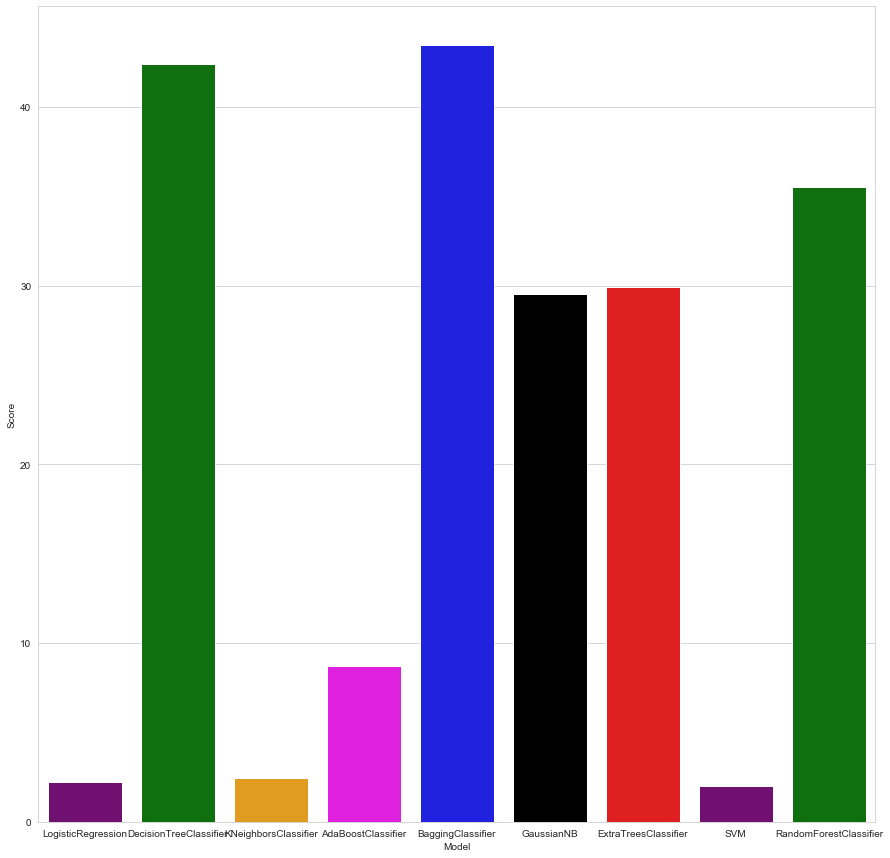

In [121]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [122]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [123]:
import sklearn.cluster as cluster

In [125]:
kmns=cluster.KMeans(n_clusters=5)

In [127]:
kmns=kmns.fit(df[['Age','Experience']])

In [128]:
kmns.cluster_centers_

array([[29.20456906,  3.92419522],
       [52.98279159, 27.50286807],
       [60.95503421, 35.81036168],
       [37.23015075, 12.03718593],
       [44.96094553, 19.90236382]])

In [147]:
df['Age by Experience']=kmns.labels_

In [129]:
from sklearn.cluster import KMeans 

In [155]:
k_range=range(1,15)
wss=[]

In [156]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Experience']])
    wss.append(km.inertia_)

In [157]:
wss

[1314327.7214000002,
 340147.8736875993,
 155917.00828157132,
 90004.30238189652,
 60846.372653932405,
 44229.40724147253,
 33673.457281807314,
 27275.71868587374,
 22024.699756819053,
 18749.764572598462,
 16228.711476928202,
 14200.046184881467,
 12849.761901198464,
 11708.269867451138]

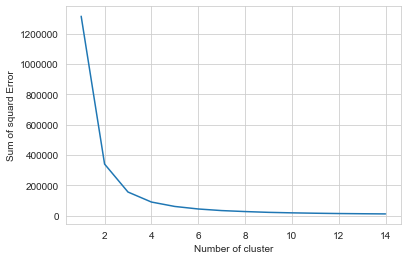

In [158]:
plt.xlabel('Number of cluster')
plt.ylabel('Sum of squard Error')
plt.plot(k_range,wss)

In [133]:
kmns=cluster.KMeans(n_clusters=5)

In [134]:
kmns=kmns.fit(df[['Age','Income']])

In [135]:
kmns.cluster_centers_

array([[ 44.67071197,  82.59223301],
       [ 46.07061901,  23.72711421],
       [ 44.42071882, 172.1141649 ],
       [ 46.06220096,  50.2481203 ],
       [ 44.39941263, 124.3010279 ]])

In [149]:
df['Age by Income']=kmns.labels_

In [159]:
k_range=range(1,12)
was=[]

In [160]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    was.append(km.inertia_)

In [161]:
was

[11250291.499000002,
 3798788.469041004,
 2023075.9428660418,
 1457076.9575468595,
 1155812.0941191607,
 993150.0280222769,
 872520.184286559,
 746387.8524605727,
 657495.8883605947,
 583590.4480650641,
 521407.7704114331]

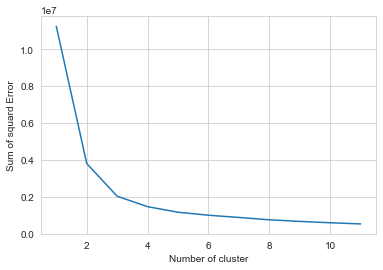

In [162]:
plt.xlabel('Number of cluster')
plt.ylabel('Sum of squard Error')
plt.plot(k_range,was)

In [139]:
kmns=cluster.KMeans(n_clusters=5)

In [140]:
kmns=kmns.fit(df[['Experience','Income']])

In [141]:
kmns.cluster_centers_

array([[ 19.39805825,  82.59223301],
       [ 20.77855275,  23.72711421],
       [ 19.44628099, 171.5661157 ],
       [ 20.734108  ,  50.2481203 ],
       [ 19.35522388, 123.9119403 ]])

In [165]:
df['Experience by Income']=kmns.labels_

In [166]:
k_range=range(1,12)
wss=[]

In [167]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Experience','Income']])
    wss.append(km.inertia_)

In [168]:
wss

[11250840.366,
 3799920.7748916983,
 2024117.5538646001,
 1458228.5330489785,
 1156989.0729259092,
 997125.0074730802,
 861371.2033228953,
 748414.2255366878,
 661665.7391976329,
 586001.2979247663,
 523611.70318378636]

In [169]:
df.shape

(5000, 17)

In [170]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age by Experience,Age by Income,Experience by Income
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,3,3,3
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1,1,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,3,3,3


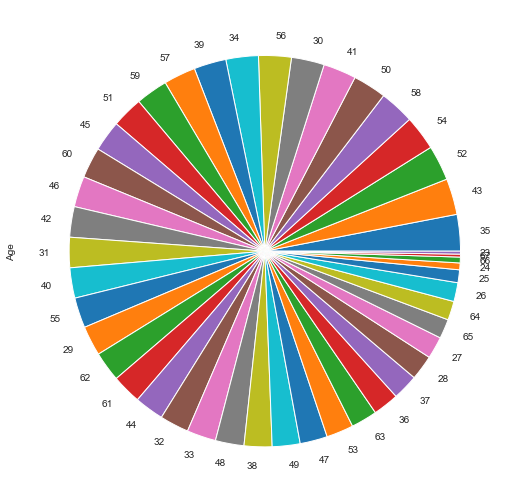

In [174]:
plt.figure(figsize = (15,9))
df.Age.value_counts().plot(kind='pie')

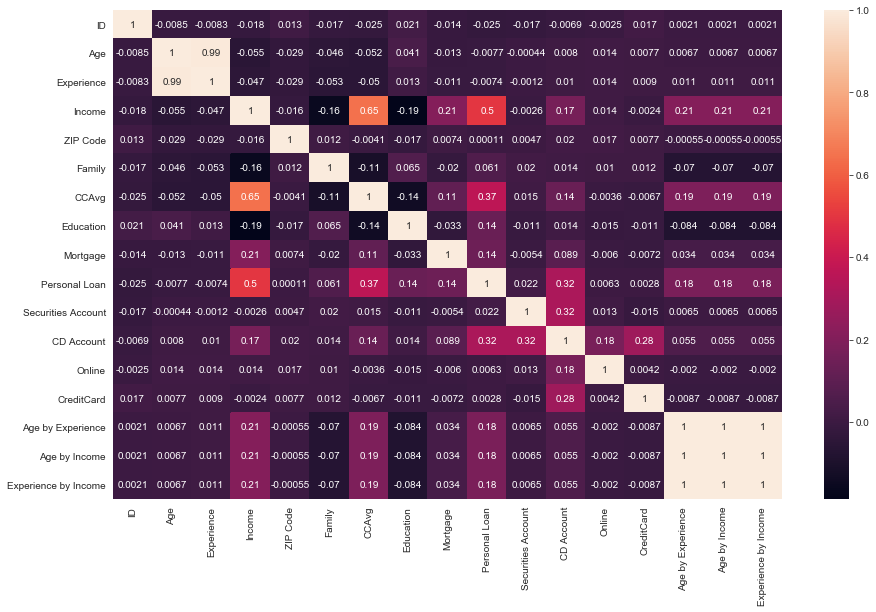

In [177]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

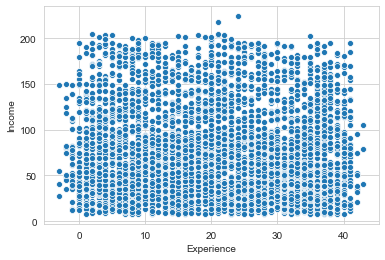

In [178]:
sns.scatterplot(x='Experience',y='Income',data=df)

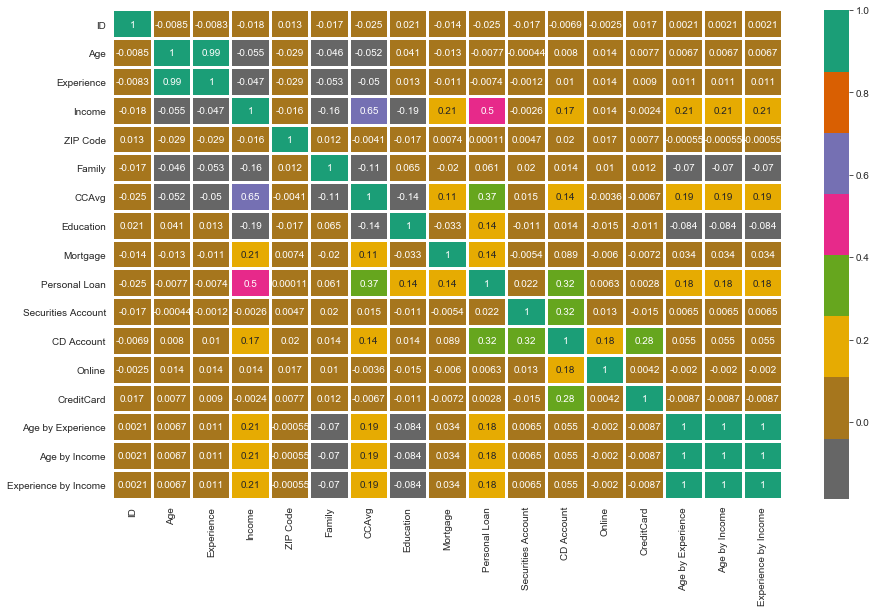

In [179]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

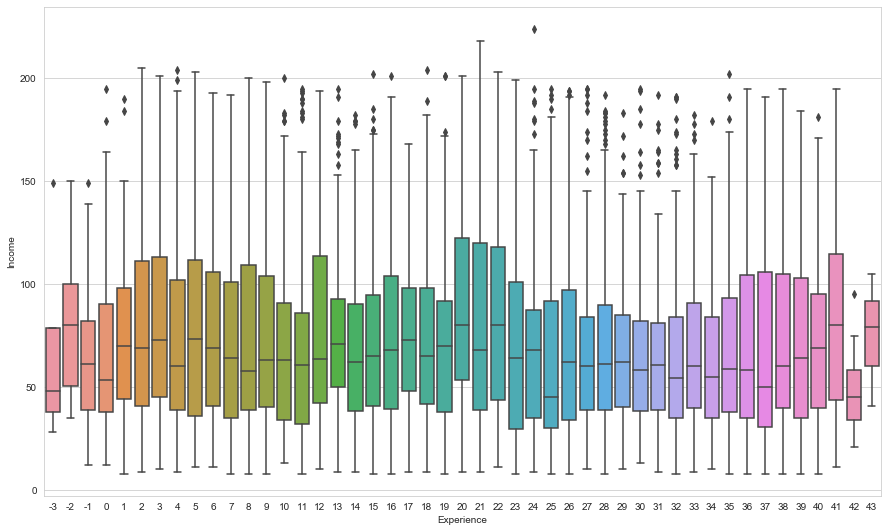

In [182]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Experience',y='Income',data=df)

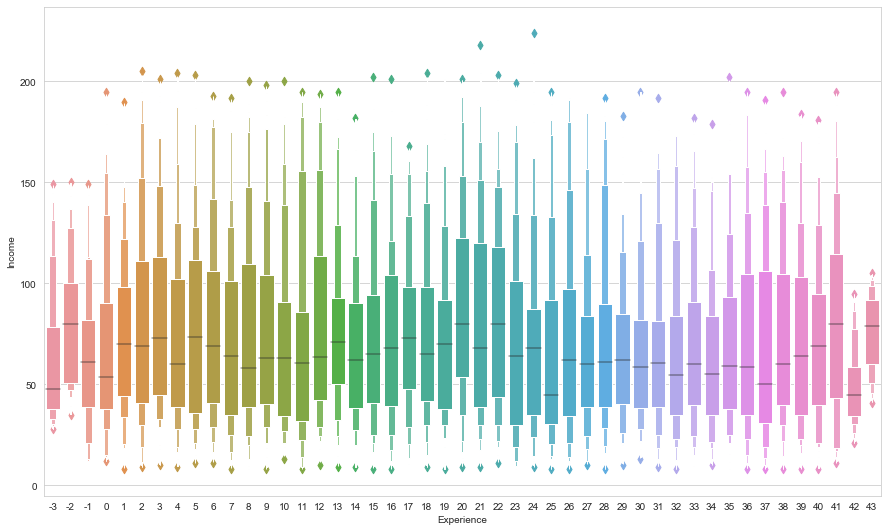

In [183]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Experience',y='Income',data=df)

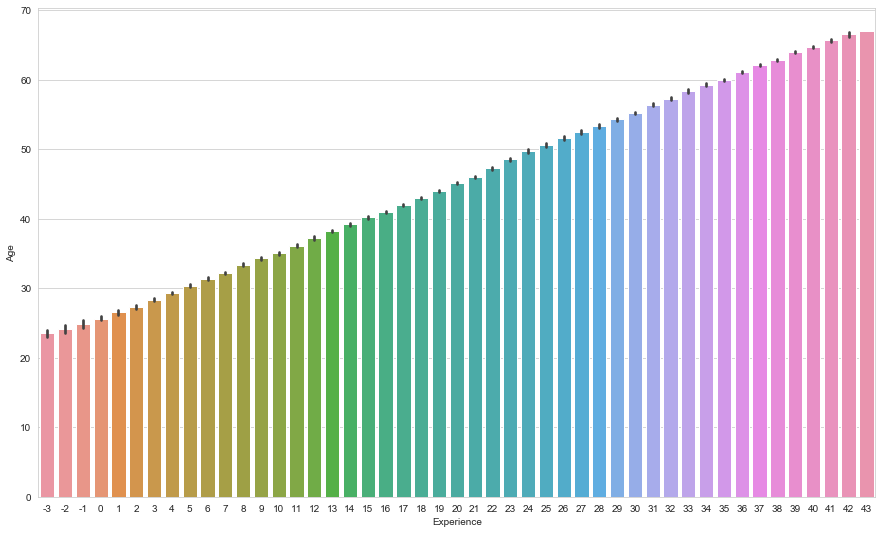

In [185]:
plt.figure(figsize=(15,9))
sns.barplot(x='Experience',y='Age',data=df)

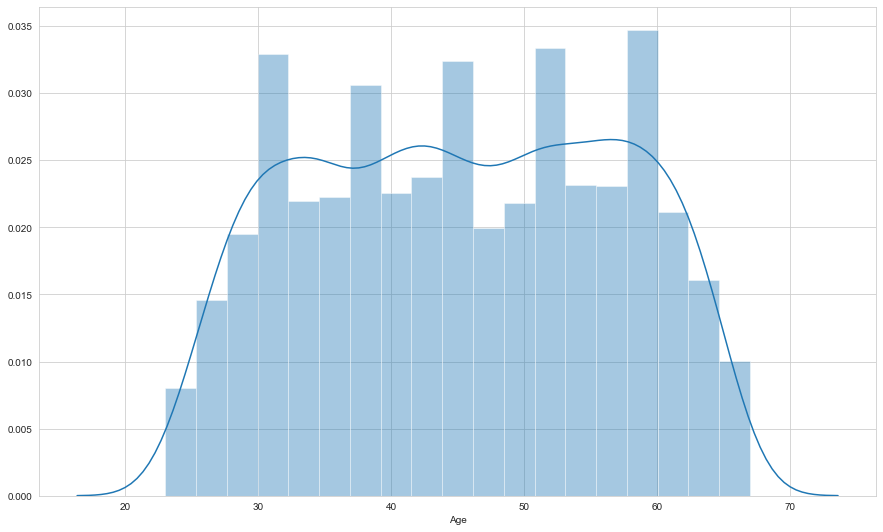

In [186]:
plt.figure(figsize=(15,9))
sns.distplot(df['Age'])

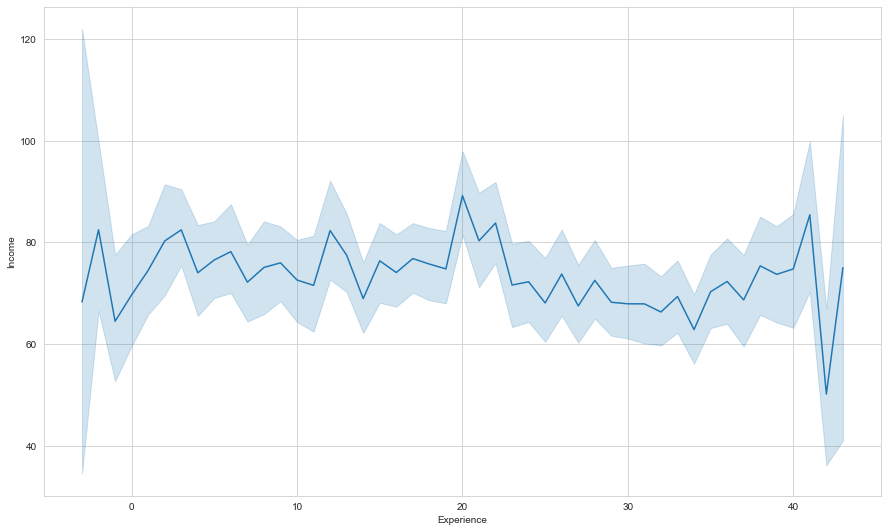

In [187]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Experience',y='Income',data=df)

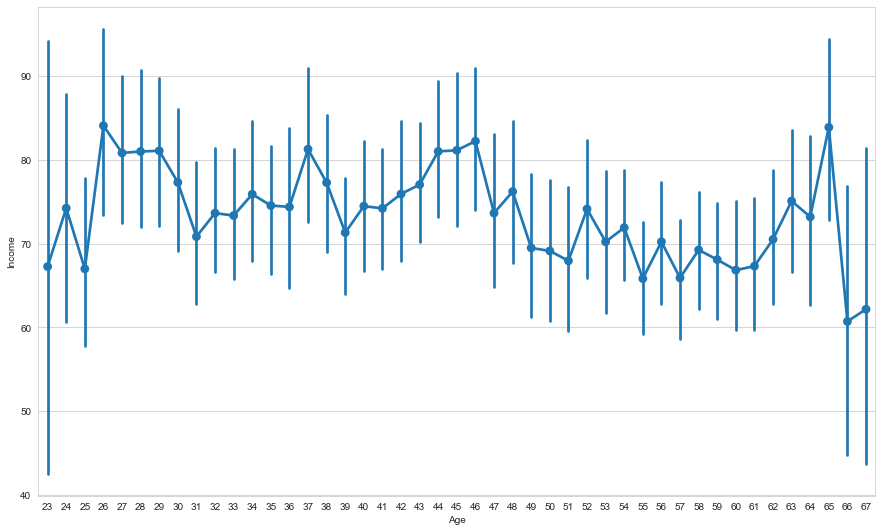

In [189]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Age',y='Income',data=df)

<Figure size 1080x648 with 0 Axes>

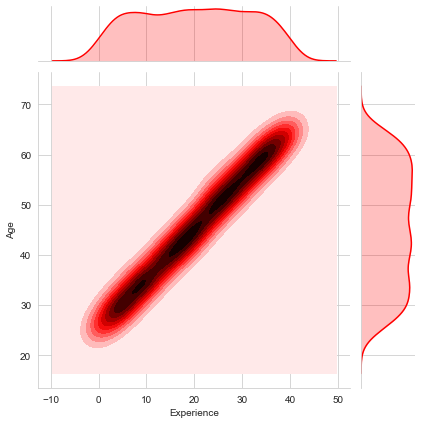

In [192]:
plt.figure(figsize=(15,9))
sns.jointplot(x='Experience',y='Age',data=df,kind='kde',color='red')

In [193]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age by Experience,Age by Income,Experience by Income
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,3,3,3
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1,1,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,3,3,3


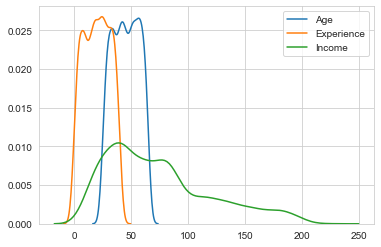

In [194]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Experience'])
sns.kdeplot(df['Income'])

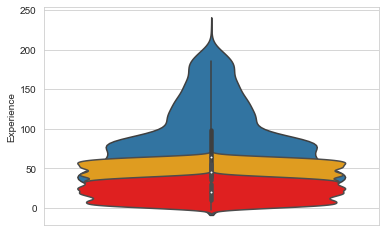

In [195]:
sns.violinplot(y="Income",data=df)
sns.violinplot(y="Age",data=df,color='orange')
sns.violinplot(y="Experience",data=df,color='red')

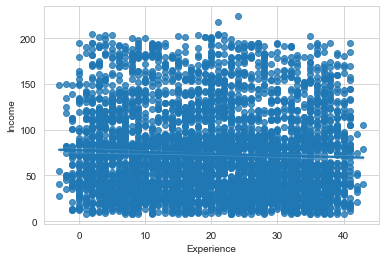

In [197]:
sns.regplot(x=df["Experience"], y=df["Income"], 
data=df)

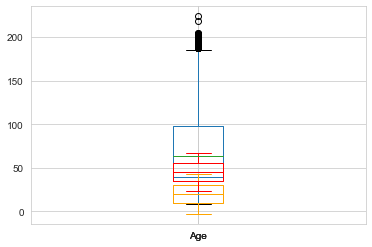

In [198]:
df.boxplot(column="Income")
df.boxplot(column="Experience",color='orange')
df.boxplot(column="Age",color='red')

In [200]:
import sweetviz as sv

In [201]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [202]:
from IPython.display import IFrame

In [203]:
IFrame(src='Analyze.html',width=1000,height=600)

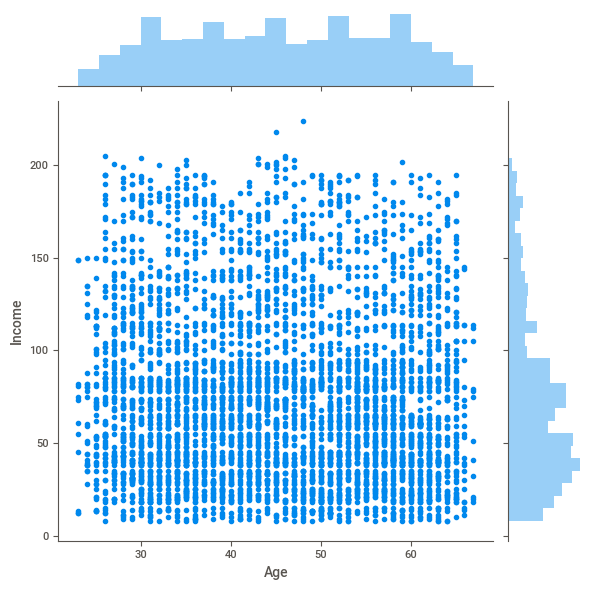

In [205]:
sns.jointplot(x="Age",y="Income",data=df)

In [206]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Age by Experience',
       'Age by Income', 'Experience by Income'],
      dtype='object')

In [207]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [208]:
man=MinMaxScaler()
feat=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Age by Experience',
       'Age by Income', 'Experience by Income']
df[feat]=man.fit_transform(df[feat])
df[feat]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age by Experience,Age by Income,Experience by Income
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.75,0.75,0.75
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.25,0.25,0.25
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.9992,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.75,0.75,0.75
4996,0.9994,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,0.0,1.0,0.0,0.25,0.25,0.25
4997,0.9996,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25
4998,0.9998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,0.0,1.0,0.0,0.75,0.75,0.75


In [209]:
man=StandardScaler()
feat=['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Age by Experience',
       'Age by Income', 'Experience by Income']
df[feat]=man.fit_transform(df[feat])
df[feat]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age by Experience,Age by Income,Experience by Income
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314,0.818391,0.818391,0.818391
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314,-0.588746,-0.588746,-0.588746
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314,-0.588746,-0.588746,-0.588746
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314,-1.292315,-1.292315,-1.292315
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632,0.818391,0.818391,0.818391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.728933,-1.425438,-1.491662,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314,0.818391,0.818391,0.818391
4996,1.729626,-1.338194,-1.404454,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.280238,-0.325875,-0.341423,-0.25354,0.821951,-0.645314,-0.588746,-0.588746,-0.588746
4997,1.730319,1.540880,1.647835,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314,-0.588746,-0.588746,-0.588746
4998,1.731012,1.715370,1.735043,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314,0.818391,0.818391,0.818391
